# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
pip uninstall -y scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.5.0
Uninstalling scikit-learn-1.5.0:
  Successfully uninstalled scikit-learn-1.5.0
Found existing installation: imbalanced-learn 0.12.2
Uninstalling imbalanced-learn-0.12.2:
  Successfully uninstalled imbalanced-learn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install scikit-learn==0.24.2
!pip install imbalanced-learn==0.8.0

     |████████████████████████████████| 7.3 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 206 kB 2.8 MB/s eta 0:00:01


In [12]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

In [7]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

0.0    912597
1.0     87403
Name: fraud, dtype: int64


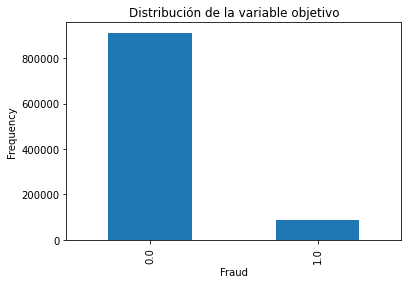

In [8]:
#1. What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

print(fraud['fraud'].value_counts())

# Visualización de la distribución
plt.figure(figsize=(6,4))
fraud['fraud'].value_counts().plot(kind='bar')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Fraud')
plt.ylabel('Frequency')
plt.show()

In [9]:
#2. Train a LogisticRegression.

# Separar características y variable objetivo
X = fraud.drop(columns=['fraud'])
y = fraud['fraud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
#3. Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
# Evaluar el modelo
log_reg.score(X_test_scaled, y_test)

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.96    200000



In [14]:
#4. Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train["fraud"] = y_train.values

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]


fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

train_over = pd.concat([fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
780419,0.890714,-0.074172,1.172600,0.366618,-0.734374,-0.334593,0.732884,1.0
498345,2.442871,-0.177207,2.516135,0.366618,-0.734374,-0.334593,0.732884,1.0
487498,-0.228100,-0.182480,0.868001,0.366618,1.361704,-0.334593,0.732884,1.0
525521,1.345261,-0.175402,0.138045,0.366618,-0.734374,-0.334593,0.732884,1.0
244719,-0.332531,-0.089242,1.284493,0.366618,-0.734374,-0.334593,0.732884,1.0
...,...,...,...,...,...,...,...,...
799995,-0.399916,-0.058666,-0.606761,-2.727632,-0.734374,-0.334593,-1.364472,0.0
799996,1.336886,-0.184330,-0.107909,0.366618,-0.734374,-0.334593,-1.364472,0.0
799997,-0.094246,-0.190421,-0.325631,0.366618,-0.734374,-0.334593,-1.364472,0.0
799998,-0.255480,-0.184217,-0.232974,0.366618,-0.734374,-0.334593,0.732884,0.0


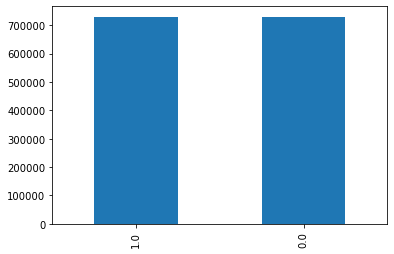

In [15]:
survived_plt = train_over["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [16]:
# Now, with balanced data, we will create a new instance of Logistic Regression.
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)




LogisticRegression()

In [17]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [18]:
#5. Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.147170,-0.181191,-0.588185,0.366618,1.361704,-0.334593,0.732884,0.0
1,-0.091174,-0.168859,-0.415653,0.366618,1.361704,-0.334593,0.732884,0.0
2,-0.334813,-0.100009,0.612860,0.366618,1.361704,-0.334593,0.732884,0.0
3,-0.317543,-0.143624,-0.551591,0.366618,-0.734374,-0.334593,0.732884,0.0
4,0.077164,-0.126583,-0.590736,0.366618,-0.734374,-0.334593,-1.364472,0.0
...,...,...,...,...,...,...,...,...
799995,-0.399916,-0.058666,-0.606761,-2.727632,-0.734374,-0.334593,-1.364472,0.0
799996,1.336886,-0.184330,-0.107909,0.366618,-0.734374,-0.334593,-1.364472,0.0
799997,-0.094246,-0.190421,-0.325631,0.366618,-0.734374,-0.334593,-1.364472,0.0
799998,-0.255480,-0.184217,-0.232974,0.366618,-0.734374,-0.334593,0.732884,0.0


In [22]:
no_fraud_undersample = resample(no_fraud, 
                                    replace=True, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_fraud_undersample

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334972,-0.324630,0.202841,-0.082387,0.366618,-0.734374,-0.334593,-1.364472,0.0
477554,-0.255016,-0.136678,-0.251904,0.366618,1.361704,-0.334593,-1.364472,0.0
129226,-0.384474,-0.131608,-0.588554,-2.727632,-0.734374,-0.334593,0.732884,0.0
166812,0.102985,-0.182768,-0.634326,0.366618,1.361704,-0.334593,-1.364472,0.0
394209,-0.339862,-0.186961,-0.565600,0.366618,-0.734374,-0.334593,-1.364472,0.0
...,...,...,...,...,...,...,...,...
509444,-0.331600,-0.179853,-0.053064,0.366618,1.361704,-0.334593,0.732884,0.0
389557,-0.353789,1.007705,-0.398868,0.366618,-0.734374,-0.334593,-1.364472,0.0
582253,-0.291767,-0.158301,-0.226416,0.366618,1.361704,-0.334593,-1.364472,0.0
670183,-0.348281,0.049960,-0.164511,0.366618,-0.734374,-0.334593,0.732884,0.0


In [23]:
train_under = pd.concat([no_fraud_undersample, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
334972,-0.324630,0.202841,-0.082387,0.366618,-0.734374,-0.334593,-1.364472,0.0
477554,-0.255016,-0.136678,-0.251904,0.366618,1.361704,-0.334593,-1.364472,0.0
129226,-0.384474,-0.131608,-0.588554,-2.727632,-0.734374,-0.334593,0.732884,0.0
166812,0.102985,-0.182768,-0.634326,0.366618,1.361704,-0.334593,-1.364472,0.0
394209,-0.339862,-0.186961,-0.565600,0.366618,-0.734374,-0.334593,-1.364472,0.0
...,...,...,...,...,...,...,...,...
799964,1.897907,-0.102498,-0.069320,0.366618,-0.734374,-0.334593,0.732884,1.0
799972,-0.382112,-0.113786,1.799053,-2.727632,-0.734374,-0.334593,-1.364472,1.0
799984,0.194263,-0.186387,0.965774,0.366618,-0.734374,-0.334593,0.732884,1.0
799987,-0.191712,-0.185819,0.835812,0.366618,-0.734374,-0.334593,0.732884,1.0


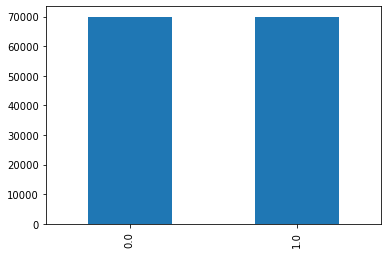

In [24]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [26]:
# Separating our features from our target

X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

#Model training

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [27]:
#Evaluate our model

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [30]:
#6. Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

sm = SMOTE(random_state = 1,sampling_strategy=1.0)

X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

# train our model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [31]:
#Evaluate our model

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

